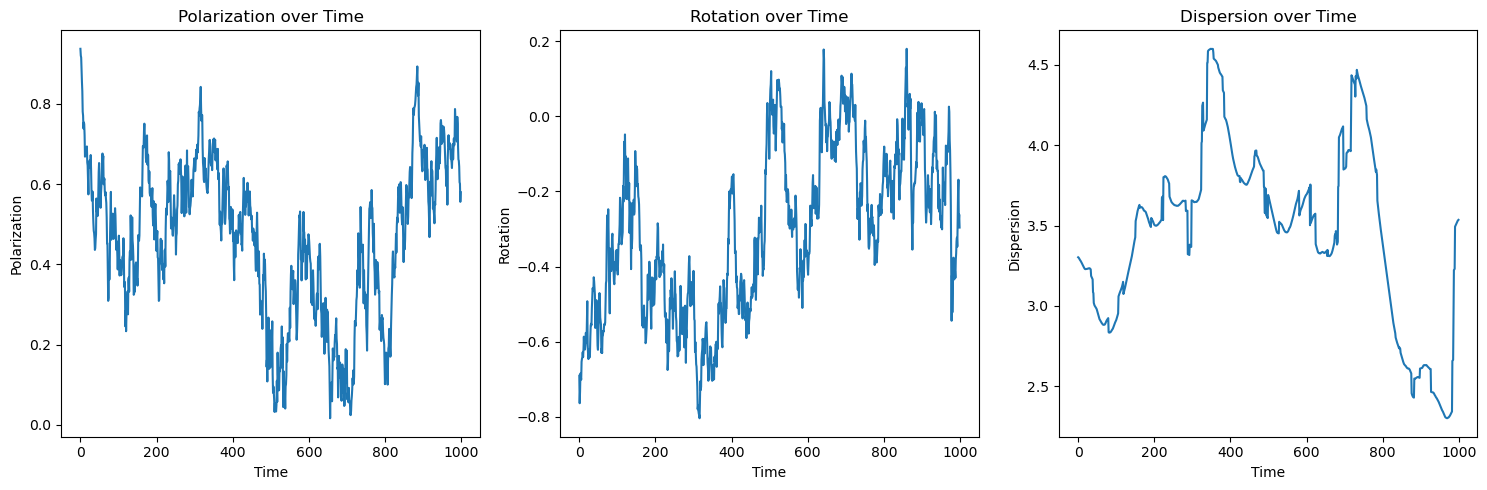

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from celluloid import Camera

# 初始化参数
N = 20  # 鸟的数量
L = 10  # 模拟空间的大小
v = 0.03  # 速度
R = 1.0  # 邻居半径
eta = 0.5  # 噪声参数
num_steps = 1000  # 模拟步数

# 初始化鸟的位置和速度
positions = np.random.rand(N, 2) * L
velocities = np.random.rand(N, 2)
velocities = velocities / np.linalg.norm(velocities, axis=1)[:, np.newaxis] * v

# 初始化存储数据的数组
position_history = np.zeros((num_steps, N, 2))
polarization_history = np.zeros(num_steps)
rotation_history = np.zeros(num_steps)
dispersion_history = np.zeros(num_steps)

def update():
    global positions, velocities
    
    # 计算每只鸟的邻居
    distances = np.linalg.norm(positions[:, np.newaxis, :] - positions[np.newaxis, :, :], axis=2)
    neighbors = distances <= R
    
    # 更新速度
    new_velocities = np.zeros_like(velocities)
    for i in range(N):
        neighbor_indices = np.where(neighbors[i])[0]
        if len(neighbor_indices) > 0:
            avg_velocity = np.mean(velocities[neighbor_indices], axis=0)
            noise = np.random.uniform(-eta, eta)
            theta = np.arctan2(avg_velocity[1], avg_velocity[0]) + noise
            new_velocities[i] = [v * np.cos(theta), v * np.sin(theta)]
        else:
            new_velocities[i] = velocities[i]
    
    velocities = new_velocities
    
    # 更新位置
    positions = positions + velocities
    positions = positions % L  # 周期性边界条件

def calculate_metrics():
    # 计算极化度
    total_velocity = np.sum(velocities, axis=0)
    polarization = np.linalg.norm(total_velocity) / (N * v)
    
    # 计算旋转度
    rotation = np.mean(np.cross(velocities / v, np.array([1, 0])))
    
    # 计算分散度
    center_of_mass = np.mean(positions, axis=0)
    dispersion = np.mean(np.linalg.norm(positions - center_of_mass, axis=1))
    
    return polarization, rotation, dispersion

# 模拟和记录数据
for t in range(num_steps):
    update()
    position_history[t] = positions
    polarization, rotation, dispersion = calculate_metrics()
    polarization_history[t] = polarization
    rotation_history[t] = rotation
    dispersion_history[t] = dispersion

# 打印每只鸟的位置时间序列
# for i in range(N):
#     print(f"Bird {i} position time series:")
#     print(position_history[:, i, :])
#     print()

# 绘制极化度、旋转度和分散度随时间的变化
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.plot(polarization_history)
plt.title('Polarization over Time')
plt.xlabel('Time')
plt.ylabel('Polarization')

plt.subplot(132)
plt.plot(rotation_history)
plt.title('Rotation over Time')
plt.xlabel('Time')
plt.ylabel('Rotation')

plt.subplot(133)
plt.plot(dispersion_history)
plt.title('Dispersion over Time')
plt.xlabel('Time')
plt.ylabel('Dispersion')

plt.tight_layout()
plt.show()

# 生成动画
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(0, L)
ax.set_ylim(0, L)
ax.set_aspect('equal')
camera = Camera(fig)

for t in range(num_steps):
    ax.clear()
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    ax.set_aspect('equal')
    ax.scatter(position_history[t, :, 0], position_history[t, :, 1], color='blue')
    camera.snap()

plt.close(fig)

In [8]:
position_history.shape

(1000, 20, 2)

In [9]:
pos_hist = position_history.reshape(position_history.shape[0], -1)
pos_hist.shape

(1000, 40)

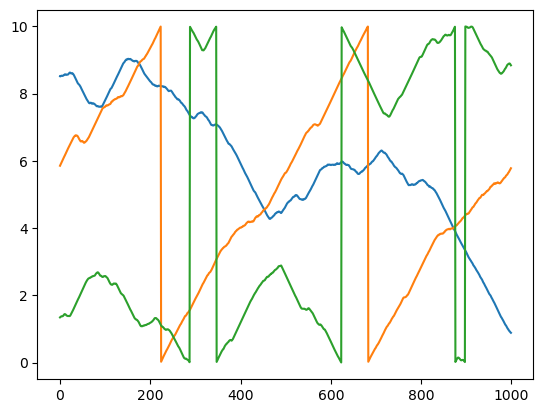

In [10]:
plt.plot(pos_hist[:,0])
plt.plot(pos_hist[:,1])
plt.plot(pos_hist[:,7])